# P2: Investigating Titanic Passenger Survival Data

The Titanic tragedy needs no introduction. One of the worst ship disasters in history, the crash of RMS Titanic in 1912 was further entrenched in our memories by James Cameron's epic Hollywood movie set against the ill-fated voyage. More than 2200 passengers were onboard the ship that fateful date, and only about 700 survived. 

In this study, we will investigate the factors that made passengers more likely to survive the tragedy. Many may be familiar with the "women and children first" code of conduct that govern emergency evacuations as in the case of Titanic. Thus we should expect to see higher survival rates for women and children. We will verify this from our sample data. In addition, this study will also probe additional research questions: Are "upper-class" passengers also more likely to survive than "lower-class" passengers? Are adult passengers with children onboard more or less likely to survive? Do these results vary by gender? 

To answer these questions, we will analyze the sample of 891 passenger data points provided, and plot graphs of relevant predictor variables against survival outcomes. Please note that we are only presenting a "directional read" on our research questions. In order to make more definitive conclusions about the data, additional statistical testing will be required which is outside the scope of this project. 

# The Data

The sample contains 891 data points and 12 variables. The ones that are of interest for the project are: 

1. "Survived": Outcome or dependent variable that tells us whether the passenger survived ("1") or not ("0"). 

2. "Sex": Takes on self-explanatory values of "male" and "female" 

3. "Age": Takes on number representing age of the passenger

4. "Pclass": Indicates whether passenger has a first-class ("1"), second-class ("2"), or third-class ("3") ticket 

5. "Parch": Indicates how many parents or children the passenger has onboard Titanic 

It should be noted that 342 (or 39%) of the 871 passengers in our dataset survived the crash.

Most of the explanatory variables are fully populated, with the exception of "Age" that had 177 missing values. 

Note further that all of these values were imported as string variables. In the "Data Wrangling" section, we will convert them into appropriate data types.

In [45]:
## Importing useful modules 

import numpy as np
import pandas as pd
import csv 
import matplotlib.pyplot as plt

## Loading data into data frame 

titanic_df = pd.read_csv('titanic_data.csv')

In [46]:
## Check for completeness of data

titanic_df.isnull().sum()

# It appears that 177 entries were missing 'age' 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
titanic_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data wrangling

Before analyzing our data, we performed a number of steps to wrangle the data into a more usable format. These include:

1. Dropping entries with no age information: This is really more for expediency so we will not have to deal with NaN's for other transformations, particularly when testing for interaction effects later on. In general, we should be careful about whether we are losing valuable information from throwing out data points with NaN's. 

2. Converting variables to appropriate data types: 'Survived' to Boolean, 'Parch' to integers, 'Age' and 'Fare' to floats. 

3. Creating 'Has_Child_Proxy' variable: Considers only adults between the ages of 25 and 50 and assigns "Yes" if the adult has at least 1 "parch", and "No" if the adult does not. For passengers that fall outside the age range, "N/A" was assigned and removed from plots. The obvious intention is to isolate parents with young children, and in doing so we have made the strong operating assumption that all the "parch" of these adults are children (and not parents) and ignored adults above 50 who may also have young children. Admittedly, this is a very rough proxy for adults with young children, but it is an attempt to test for an interesting phenomenon while operating within the restrictions of an inconvenient data setup.    

4. Grouping ages into buckets: <10, 10-19, 20-29, 30-39, 40-49, 50-59, and 60+


In [48]:
## Drop records where 'Age' was not available (714 records remain)

titanic_df.dropna(inplace=True,subset=["Age"])

In [49]:
## Converting 'Parch' to integers

titanic_df['Parch'] = titanic_df['Parch'].astype('int')

## Converting 'Age' and 'Fare' to floats 

titanic_df['Age'] = titanic_df['Age'].astype('float')    
titanic_df['Fare'] = titanic_df['Fare'].astype('float')

## Converting 'Survived' to Boolean

titanic_df['Survived'] = titanic_df['Survived'].astype('Bool')

In [50]:
## Transforming 'ParCh' into Boolean variable 'has_parch"

def group_parch(Parch):
    if Parch == 0: 
        return False 
    else: 
        return True 
    
titanic_df["Has_Parch"] = titanic_df["Parch"].apply(group_parch)

## Creating new variable 'adult_has_parch' based on 'has_parch' and 'age' 

def group_adult(df): 
    if df["Age"] in range(25,50):
        if df["Has_Parch"]: 
            return True
        else: 
            return False 
    else: 
        return "N/A"

titanic_df["Has_Child_Proxy"] = titanic_df.apply(group_adult, axis=1)

It is probably worth emphasizing that "Has_Parch" is very much an artificially engineered proxy variable. Evident from the scatterplot below, passengers of all ages could have a non-zero "Parch" because both types of dependent relationships were mixed into one variable. Young children onboard in all likelihood must be traveling with at least 1 "Parch" (parent) although there appears to be one bad data point without. On the other hand, the elderly may also be traveling with their "not-so-young" children. Since our hypothesis of interest was to see whether adult passengers with children had a lower chance of survival, we had to exclude both the youngest and oldest passengers. An arbitrary 25-50 range was defined as the qualifying age for these adults, in addition to the simplifying assumption that all of their dependents were children. (Note: the latter assumption wasn't as critical - we could have framed our hypothesis around "saving dependents" vs. "saving children", but the latter made for better narration. Ideally it would have been great to have "Parch" broken down into number of parents and children separately and we would have used the latter.) 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


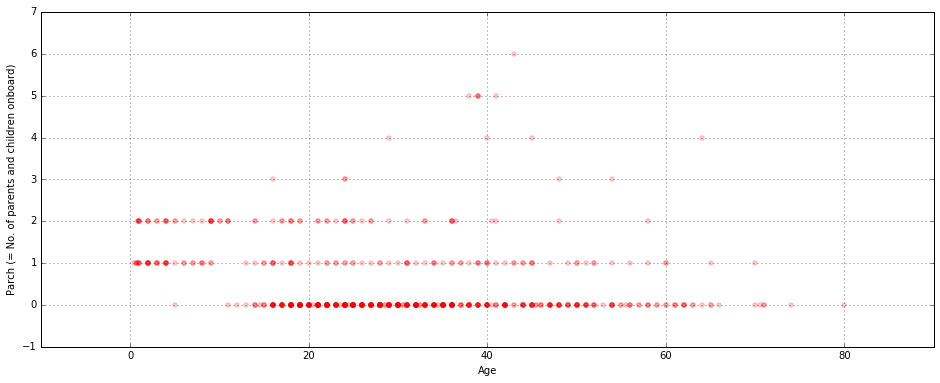

In [51]:
## Scatterplot of age vs. "Parch" 

% pylab inline

fit, ax = plt.subplots(figsize = (16,6)) 
ax.scatter(titanic_df.Age, titanic_df.Parch, alpha = 0.2, color = 'red')
ax.grid(True)
plt.xlabel('Age')
plt.ylabel('Parch (= No. of parents and children onboard)')

In [52]:
## Grouping ages into buckets

def group_age(age):
    if age < 10: 
        return "<10"
    elif age < 20: 
        return "10-19"
    elif age < 30: 
        return "20-29"
    elif age < 40: 
        return "30-39"
    elif age < 50: 
        return "40-49"
    elif age < 60: 
        return "50-59"
    else: 
        return "60+"

titanic_df["Age_Group"] = titanic_df["Age"].apply(group_age)

## Declaring 'age_group' as categorical variable and re-ordering levels for plots 

titanic_df['Age_Group'] = titanic_df['Age_Group'].astype('category')
age_sorter = ['<10','10-19','20-29','30-39','40-49','50-59','60+']
titanic_df.Age_Group.cat.set_categories(age_sorter, inplace=True)


It is also worthwhile to note that we left out "Fare" from the variables to consider because much of the information that we could have gleaned from it (i.e. connections and priority access to emergency evacuations) that is relevant to our analysis would have been already captured in 'Pclass'. In the chart below, we see that 'Fare' is indeed correlated with 'Pclass', with first-class passengers paying a lot more than second- and third-class passengers. Including the numerical variable "Fare" likely will not give us additional useful information, and might instead cause multicollinearity issues in a more rigorous statistical study. 

Populating the interactive namespace from numpy and matplotlib


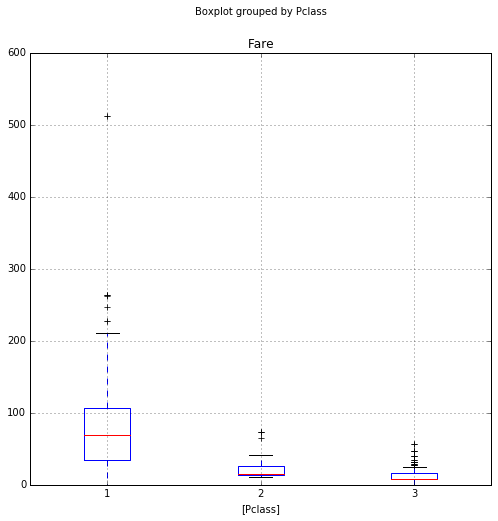

In [53]:
## Boxplot to correlation between 'Fare' and 'Pclass'

% pylab inline 
df_fare_pclass = titanic_df[['Fare','Pclass']]
df_fare_pclass.boxplot(by='Pclass', figsize = (8,8), showfliers=True)


# Analysis of single variable effects

The charts below provide some initial answers to our research questions. 

The first set of plots are stacked column charts that show the distribution of data by each variable as well as their survival outcome. Here we observe that there are a lot more males onboard than females, approximately as many third-class passengers as first- and second-class combined, a good distribution of age groups with ~160 under the age of 20, and over 50 adults assumed to be "adults with child(ren)" under our operating definition.

While we can begin to interpret the effect of each variable on survival outcomes, the second set of plots (100% stacked column charts) provides an easier read on the proportion of each group that survived vs. perished. 

Populating the interactive namespace from numpy and matplotlib


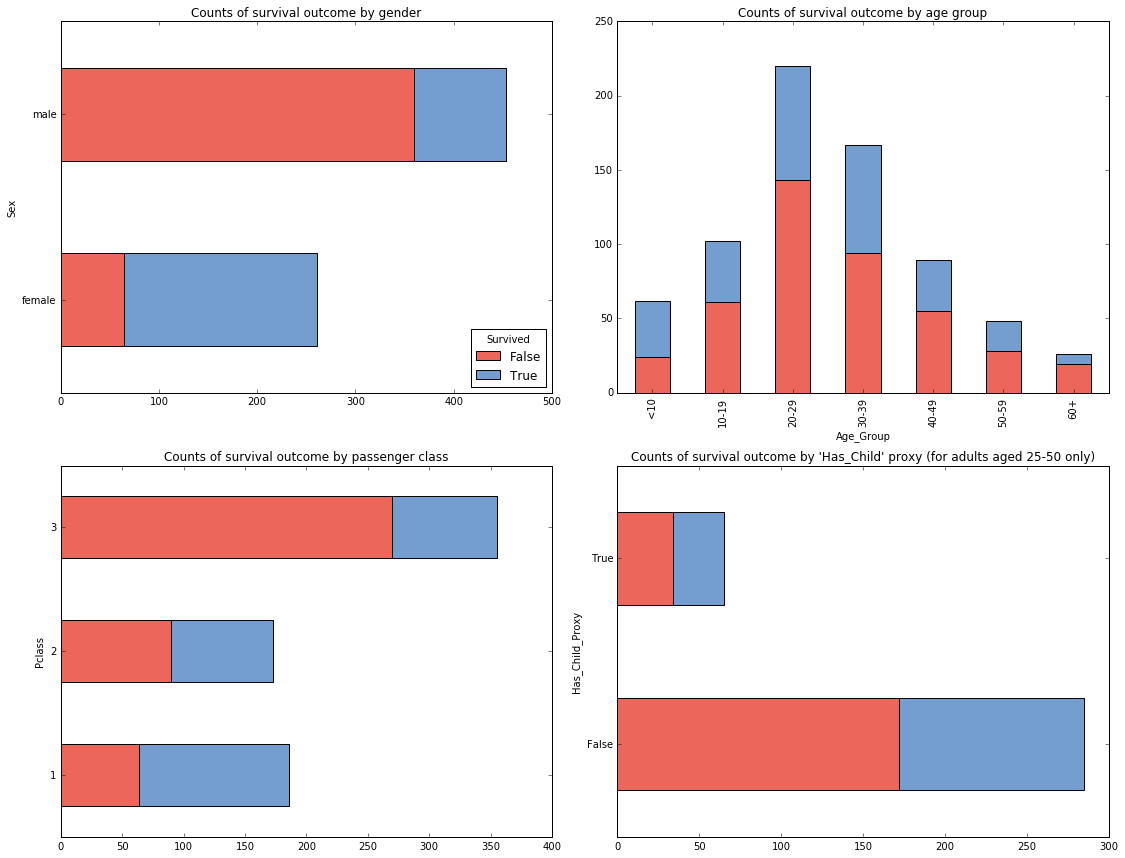

In [54]:
% pylab inline 

## Create figure to contain plots

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(16)

## Set colors to use in plots 

t_blue = (0.45,0.62,0.81)
t_red = (0.93,0.4,0.36)

## Create stacked column charts 

sex_counts = titanic_df.groupby(['Sex','Survived']).size().unstack()
sex_counts.plot(kind='barh',stacked=True,color=[t_red,t_blue],ax=axes[0,0],title="Counts of survival outcome by gender")

age_counts = titanic_df.groupby(['Age_Group','Survived']).size().unstack()
age_counts.plot(kind='bar',stacked=True,color=[t_red,t_blue],ax=axes[0,1],legend=False, title="Counts of survival outcome by age group")

pclass_counts = titanic_df.groupby(['Pclass','Survived']).size().unstack()
pclass_counts.plot(kind='barh',stacked=True,color=[t_red,t_blue],ax=axes[1,0],legend=False, title="Counts of survival outcome by passenger class")

titanic_df_reduced = titanic_df[titanic_df['Has_Child_Proxy']!="N/A"] ## to hide N/A's from plot
has_child_proxy_counts = titanic_df_reduced.groupby(['Has_Child_Proxy','Survived']).size().unstack()
has_child_proxy_counts.plot(kind='barh',stacked=True,color=[t_red,t_blue],ax=axes[1,1],legend=False, title="Counts of survival outcome by 'Has_Child' proxy (for adults aged 25-50 only)")

plt.tight_layout()

With each stacked column chart normalized to 100%, we get a much better read on the data. Let us analyze each variable:

1. Sex: Consistent with our expectations based on the "women and children first" code of conduct, a much higher proportion of women survived (75%) relative to men (25%). 

2. Age: While the disparity is not as spark here, we too observe a higher rate of survival amongst children under the age of 10 (61%) relative to other age groups, which had survival rates ranging between 35-44%, consistent with the "women and children first" code of conduct. Another interesting albeit unsurprising observation here is that the elderly aged 60 and above appears to have a considerably lower survival rate of 27%. 

3. Passenger Class: A greater proportion of first-class passengers survived (66%) than second-class passengers (48%), who in turn also out-survived third-class passengers (24%). 

4. "Has Child" Proxy: There does not appear to be much difference between the adults (aged between 25-50) deemed to have children onboard (48%) vs. those who don't (40%). Moreover, the results were directionally surprising as I would have expected those without children to have a higher likelihood to survive, as they only have to "fend for themselves" instead of compromising on their own safety to save their children. We will revisit this hypothesis in the next section where we analyze the interaction effects between gender and this variable.


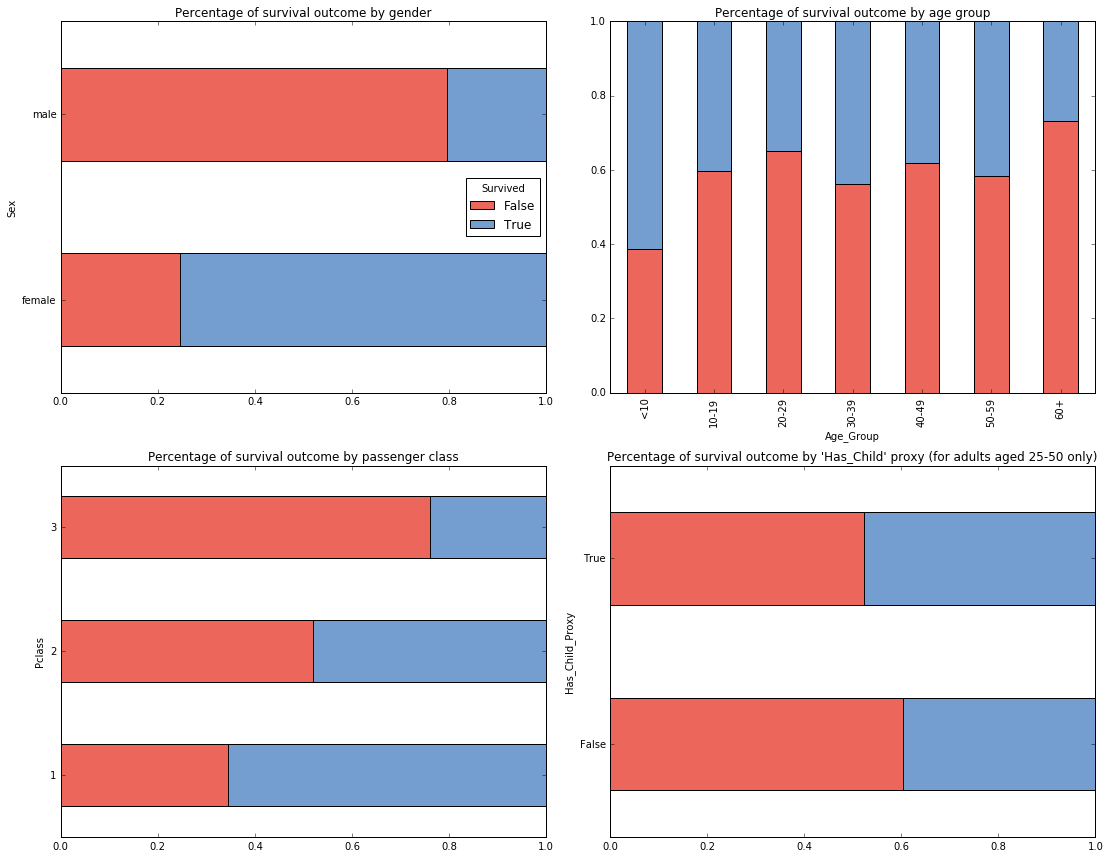

In [55]:
## Convert them to 100% stacked column charts for better interpretation

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(16)

sex_counts_normed = sex_counts.div(sex_counts.sum(1),axis=0)
sex_counts_normed.plot(kind='barh',stacked=True,color=[t_red,t_blue],ax=axes[0,0],title="Percentage of survival outcome by gender")

age_counts_normed = age_counts.div(age_counts.sum(1),axis=0)
age_counts_normed.plot(kind='bar',stacked=True,color=[t_red,t_blue],ax=axes[0,1],legend=False,title="Percentage of survival outcome by age group")

pclass_counts_normed = pclass_counts.div(pclass_counts.sum(1),axis=0)
pclass_counts_normed.plot(kind='barh',stacked=True,color=[t_red,t_blue],ax=axes[1,0],legend=False,title="Percentage of survival outcome by passenger class")

has_child_proxy_counts_normed = has_child_proxy_counts.div(has_child_proxy_counts.sum(1),axis=0)
has_child_proxy_counts_normed.plot(kind='barh',stacked=True,color=[t_red,t_blue],ax=axes[1,1],legend=False,title="Percentage of survival outcome by 'Has_Child' proxy (for adults aged 25-50 only)")

plt.tight_layout()

In [56]:
print sex_counts_normed
print age_counts_normed 
print pclass_counts_normed
print has_child_proxy_counts_normed

Survived     False     True 
Sex                         
female    0.245211  0.754789
male      0.794702  0.205298
Survived      False     True 
Age_Group                    
<10        0.387097  0.612903
10-19      0.598039  0.401961
20-29      0.650000  0.350000
30-39      0.562874  0.437126
40-49      0.617978  0.382022
50-59      0.583333  0.416667
60+        0.730769  0.269231
Survived     False     True 
Pclass                      
1         0.344086  0.655914
2         0.520231  0.479769
3         0.760563  0.239437
Survived            False     True 
Has_Child_Proxy                    
False            0.603509  0.396491
True             0.523077  0.476923


# More data wrangling

In order to observe the interaction effects between gender and variables such as 'pclass' and 'has_child_proxy', we will create additional categorical variables that classify the gender-pclass and gender-'has-child' status for each passenger:

1. The first interaction variable is 'Sex_Pclass' which takes on one of 6 self-explanatory values of 'male_1class', 'male_2class', 'male_3class', 'female_1class', 'female_2class', 'female_3class' that indicates the gender and class of the passenger.

2. The second interaction variable is 'Sex_Has_Child_Proxy' which assigns male adult passengers with at least one child onboard (again, per operating assumptions earlier) the value of 'male_with_child', female adult passengers with at least one child onboard as 'female_with_child'. Qualifying adults (aged 25 to 50) without children will be labeled 'male_without_child' and 'female_without_child' based on gender. 

In [57]:
## Create sex_pclass interaction variable (note: 1 & 2 are grouped as "upper")

def create_sex_pclass(df): 
    return df["Sex"] + "_" + str(df["Pclass"]) + "class"

titanic_df["Sex_Pclass"] = titanic_df.apply(create_sex_pclass,axis=1) 

In [58]:
## Create sex_has_child_proxy interaction variable 

def create_sex_has_child_proxy(df): 
    if df["Has_Child_Proxy"] == True: 
        if df["Sex"] == "male": 
            return "male_with_child"
        else: 
            return "female_with_child"
    elif df["Has_Child_Proxy"] == False: 
        if df["Sex"] == "male": 
            return "male_wo_child"
        else: 
            return "female_wo_child"        
    else: 
        return "N/A"
    
titanic_df["Sex_Has_Child_Proxy"] = titanic_df.apply(create_sex_has_child_proxy,axis=1)

titanic_df_reduced2 = titanic_df[titanic_df["Sex_Has_Child_Proxy"]!="N/A"] # to hide "N/A's" from plots


# Analysis of interaction effects between variables

The charts below give us some insight into the interaction effects between gender and our two variables of interest ('Pclass' and 'Sex_Has_Child'). The charts on the left are stacked bar charts by count, and on the right are stacked bar charts by percentage of group count which allows for easier interpretation of the survived vs. perished breakdown: 

1. 'Sex_Pclass': The trends that we have seen from the single-variable analysis still ring true here: within each gender, the survival rates generally decline with passenger class ("1class">"2class">"3class"); similarly, within each passenger class, women were far more likely to survive than men. In addition, there are three noteworthy observations: a) Women in first- and second-class had really good survival rates (>90%), b) On the flip side, men in second- and third-class had really poor survival rates (~15%), 3) Perhaps most interesting of all, women in third-class had a much poorer survival rate (46%) than their first- and second-class counterparts (>90%); in fact, they only out-survived men in first-class (40%) by a few percentage points. 

2. 'Sex_Has_Child_Proxy': Recall from the previous section that the results we got for 'Has_Child_Proxy' ran counter to our intuition: adults with child(ren) had out-survived thsoe without slightly by 8%. After controlling for gender in this case, however, we obtained results that are more in line with our intuition: women with at least one child had a 17% lower survival rate than women without, and similarly men with at least one child had a 10% lower survival rate than their counterparts without. One may then infer that previously in our single-variable analysis, we saw the opposite effect because there were many more women with children than men with children (even though men made up the majority of passengers), and women, as we know, are far more likely to survive than men. It was thus a crucial step to create the interaction variable to tease out the 'Has_Child' effect.

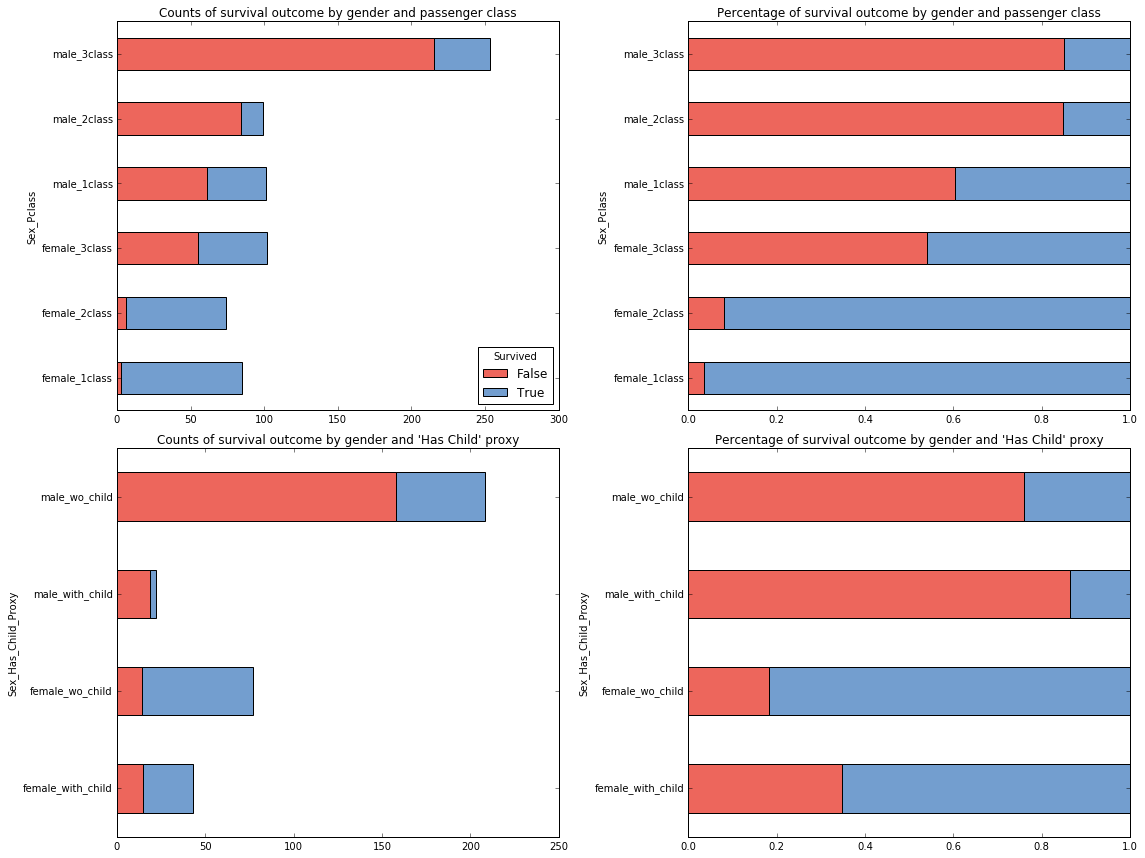

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(16)

sex_pclass_counts = titanic_df.groupby(['Sex_Pclass','Survived']).size().unstack()
sex_pclass_counts.plot(kind='barh',stacked=True,color=[t_red,t_blue],ax=axes[0,0],title="Counts of survival outcome by gender and passenger class")

sex_pclass_normed_counts = sex_pclass_counts.div(sex_pclass_counts.sum(1),axis=0)
sex_pclass_normed_counts.plot(kind='barh',stacked=True,color=[t_red,t_blue],ax=axes[0,1],legend=False,title="Percentage of survival outcome by gender and passenger class")

sex_has_child_counts = titanic_df_reduced2.groupby(['Sex_Has_Child_Proxy','Survived']).size().unstack()
sex_has_child_counts.plot(kind='barh',stacked=True,color=[t_red,t_blue],ax=axes[1,0],legend=False,title="Counts of survival outcome by gender and 'Has Child' proxy")

sex_has_child_normed_counts = sex_has_child_counts.div(sex_has_child_counts.sum(1),axis=0)
sex_has_child_normed_counts.plot(kind='barh',stacked=True,color=[t_red,t_blue],ax=axes[1,1],legend=False,title="Percentage of survival outcome by gender and 'Has Child' proxy")

plt.tight_layout()

In [60]:
print sex_pclass_normed_counts
print sex_has_child_normed_counts

Survived          False     True 
Sex_Pclass                       
female_1class  0.035294  0.964706
female_2class  0.081081  0.918919
female_3class  0.539216  0.460784
male_1class    0.603960  0.396040
male_2class    0.848485  0.151515
male_3class    0.849802  0.150198
Survived                False     True 
Sex_Has_Child_Proxy                    
female_with_child    0.348837  0.651163
female_wo_child      0.181818  0.818182
male_with_child      0.863636  0.136364
male_wo_child        0.759615  0.240385


# Conclusion

In conclusion, our study has corroborated much of our intuition and initial hypotheses. Consistent with the "women and children first" mantra, we found that children (below age of 10) and women (particularly those in first and second class) indeed had relatively better odds of survival in the Titanic crash. Passengers in more privileged classes were also more likely to survive, likely due to their priority access to evacuation routes. Last but not least, we also found some evidence that may suggest adults with children had lower survival odds than their counterparts without, potentially because these parents might have sacrificied their lives in a bid to look for or save their children. 

However, we cannot emphasize enough that the above conclusions are only "directional reads" on the data. While there are trends that appear so strong (e.g. females more likely to survive than men) that we may be fairly confident are statistically significant by simply examining their charts and mean differences, we should in general perform additional statistical testing (outside scope of this project) before making more definitive conclusions. 


# References

Books: 
"Python for Data Analysis" by Wes McKinney

Websites: 
http://www.wikiwand.com/en/RMS_Titanic; http://www.wikiwand.com/en/Women_and_children_first; 
http://stackoverflow.com/questions/18748171/pandas-data-frame-transform-int64-columns-to-boolean;
http://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-the-column-in-panda-data-frame; 
http://stackoverflow.com/questions/29498652/plot-bar-graph-from-pandas-dataframe;
http://nbviewer.ipython.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb;
http://stackoverflow.com/questions/16392921/make-more-than-one-chart-in-same-ipython-notebook-cell; http://tableaufriction.blogspot.com/2012/11/finally-you-can-use-tableau-data-colors.html;
http://matplotlib.org/users/tight_layout_guide.html